<a href="https://colab.research.google.com/github/hjzts/2025-Math-Modeling/blob/hj/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 模型构建

## 加载数据

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
%cd dataset
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/dataset
classified_country_medal_stats_after1950.csv	    noc_codes.json
classified_country_medal_stats_after1984.csv	    olympic_medals_2000-2020.csv
classified_country_medal_stats_after1984_useCV.csv  olympic_medals_with_noc.csv
classified_country_medal_stats.csv		    olympic_score_model.pkl
classified_country_medal_stats_cv.csv		    potential_stars.csv
country_clusters.csv				    potential_stars_filtered.csv
country.csv					    residual_plot.png
country_medal_clusters.csv			    robust_scaler.pkl
country_medal_probability.csv			    scatter_matrix.png
country_medal_stats.csv				    score_validation.png
country_medal_vectors.csv			    sport_discipline.json
country_olympic_potential.csv			    sport_events.json
country_sport_correlation_top.csv		    sports_list.json
country_sport_medal_vectors.csv			    summerOly_athletes.c

## 导入包

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 数据清洗

In [ ]:
noc_dict = {
    "Afghanistan": "AFG",
    "Albania": "ALB",
    "Algeria": "ALG",
    "Andorra": "AND",
    "Angola": "ANG",
    "Antigua and Barbuda": "ANT",
    "Argentina": "ARG",
    "Armenia": "ARM",
    "Aruba": "ARU",
    "American Samoa": "ASA",
    "Australia": "AUS",
    "Austria": "AUT",
    "Azerbaijan": "AZE",
    "Bahamas": "BAH",
    "Bangladesh": "BAN",
    "Barbados": "BAR",
    "Burundi": "BDI",
    "Belgium": "BEL",
    "Benin": "BEN",
    "Bermuda": "BER",
    "Bhutan": "BHU",
    "Bosnia and Herzegovina": "BIH",
    "Belize": "BIZ",
    "Belarus": "BLR",
    "Bolivia": "BOL",
    "Botswana": "BOT",
    "Brazil": "BRA",
    "Bahrain": "BRN",
    "Brunei": "BRU",
    "Bulgaria": "BUL",
    "Burkina Faso": "BUR",
    "Central African Republic": "CAF",
    "Cambodia": "CAM",
    "Canada": "CAN",
    "Cayman Islands": "CAY",
    "Republic of the Congo": "CGO",
    "Chad": "CHA",
    "Chile": "CHI",
    "China": "CHN",
    "Ivory Coast": "CIV",
    "Cameroon": "CMR",
    "Democratic Republic of the Congo": "COD",
    "Cook Islands": "COK",
    "Colombia": "COL",
    "Comoros": "COM",
    "Cape Verde": "CPV",
    "Costa Rica": "CRC",
    "Croatia": "CRO",
    "Cuba": "CUB",
    "Cyprus": "CYP",
    "Czech Republic": "CZE",
    "Denmark": "DEN",
    "Djibouti": "DJI",
    "Dominica": "DMA",
    "Dominican Republic": "DOM",
    "Ecuador": "ECU",
    "Egypt": "EGY",
    "Eritrea": "ERI",
    "El Salvador": "ESA",
    "Spain": "ESP",
    "Estonia": "EST",
    "Ethiopia": "ETH",
    "Fiji": "FIJ",
    "Finland": "FIN",
    "France": "FRA",
    "Federated States of Micronesia": "FSM",
    "Gabon": "GAB",
    "The Gambia": "GAM",
    "Great Britain": "GBR",
    "Guinea-Bissau": "GBS",
    "Georgia": "GEO",
    "Equatorial Guinea": "GEQ",
    "Germany": "GER",
    "Ghana": "GHA",
    "Greece": "GRE",
    "Grenada": "GRN",
    "Guatemala": "GUA",
    "Guinea": "GUI",
    "Guam": "GUM",
    "Guyana": "GUY",
    "Haiti": "HAI",
    "Hong Kong": "HKG",
    "Honduras": "HON",
    "Hungary": "HUN",
    "Indonesia": "INA",
    "India": "IND",
    "Iran": "IRI",
    "Ireland": "IRL",
    "Iraq": "IRQ",
    "Iceland": "ISL",
    "Israel": "ISR",
    "Virgin Islands": "ISV",
    "Italy": "ITA",
    "British Virgin Islands": "IVB",
    "Jamaica": "JAM",
    "Jordan": "JOR",
    "Japan": "JPN",
    "Kazakhstan": "KAZ",
    "Kenya": "KEN",
    "Kyrgyzstan": "KGZ",
    "Kiribati": "KIR",
    "South Korea": "KOR",
    "Kosovo": "KOS",
    "Saudi Arabia": "KSA",
    "Kuwait": "KUW",
    "Laos": "LAO",
    "Latvia": "LAT",
    "Libya": "LBA",
    "Lebanon": "LBN",
    "Liberia": "LBR",
    "Saint Lucia": "LCA",
    "Lesotho": "LES",
    "Liechtenstein": "LIE",
    "Lithuania": "LTU",
    "Luxembourg": "LUX",
    "Madagascar": "MAD",
    "Morocco": "MAR",
    "Malaysia": "MAS",
    "Malawi": "MAW",
    "Moldova": "MDA",
    "Maldives": "MDV",
    "Mexico": "MEX",
    "Mongolia": "MGL",
    "Marshall Islands": "MHL",
    "North Macedonia": "MKD",
    "Mali": "MLI",
    "Malta": "MLT",
    "Montenegro": "MNE",
    "Monaco": "MON",
    "Mozambique": "MOZ",
    "Mauritius": "MRI",
    "Mauritania": "MTN",
    "Myanmar": "MYA",
    "Namibia": "NAM",
    "Nicaragua": "NCA",
    "Netherlands": "NED",
    "Nepal": "NEP",
    "Nigeria": "NGR",
    "Niger": "NIG",
    "Norway": "NOR",
    "Nauru": "NRU",
    "New Zealand": "NZL",
    "Oman": "OMA",
    "Pakistan": "PAK",
    "Panama": "PAN",
    "Paraguay": "PAR",
    "Peru": "PER",
    "Philippines": "PHI",
    "Palestine": "PLE",
    "Palau": "PLW",
    "Papua New Guinea": "PNG",
    "Poland": "POL",
    "Portugal": "POR",
    "North Korea": "PRK",
    "Puerto Rico": "PUR",
    "Qatar": "QAT",
    "Romania": "ROU",
    "South Africa": "RSA",
    "Russia": "RUS",
    "Rwanda": "RWA",
    "Samoa": "SAM",
    "Senegal": "SEN",
    "Seychelles": "SEY",
    "Singapore": "SGP",
    "Saint Kitts and Nevis": "SKN",
    "Sierra Leone": "SLE",
    "Slovenia": "SLO",
    "San Marino": "SMR",
    "Solomon Islands": "SOL",
    "Somalia": "SOM",
    "Serbia": "SRB",
    "Sri Lanka": "SRI",
    "South Sudan": "SSD",
    "São Tomé and Príncipe": "STP",
    "Sudan": "SUD",
    "Switzerland": "SUI",
    "Suriname": "SUR",
    "Slovakia": "SVK",
    "Sweden": "SWE",
    "Eswatini": "SWZ",
    "Syria": "SYR",
    "Tanzania": "TAN",
    "Tonga": "TGA",
    "Thailand": "THA",
    "Tajikistan": "TJK",
    "Turkmenistan": "TKM",
    "Timor-Leste": "TLS",
    "Togo": "TOG",
    "Chinese Taipei": "TPE",
    "Trinidad and Tobago": "TTO",
    "Tunisia": "TUN",
    "Turkey": "TUR",
    "Tuvalu": "TUV",
    "United Arab Emirates": "UAE",
    "Uganda": "UGA",
    "Ukraine": "UKR",
    "Uruguay": "URU",
    "United States": "USA",
    "Uzbekistan": "UZB",
    "Vanuatu": "VAN",
    "Venezuela": "VEN",
    "Vietnam": "VIE",
    "Saint Vincent and the Grenadines": "VIN",
    "Yemen": "YEM",
    "Zambia": "ZAM",
    "Zimbabwe": "ZIM"
}

读入数据DataFrame

In [ ]:
athletes = pd.read_csv('summerOly_athletes.csv')
hosts = pd.read_csv('summerOly_hosts.csv')
medal_counts = pd.read_csv('summerOly_medal_counts.csv')
programs = pd.read_csv('summerOly_programs.csv',encoding = 'latin-1')

programs数据清洗

In [ ]:
# 读取 summerOly_programs.csv 文件，指定编码为 'latin1'
try:
    programs = pd.read_csv('summerOly_programs.csv', encoding='latin1')
except UnicodeDecodeError:
    # 如果 'latin1' 也不适用，尝试其他编码
    programs = pd.read_csv('summerOly_programs.csv', encoding='ISO-8859-1')

# 提取年份列（从 1896 到 2024）
year_columns = programs.columns[4:]  # 假设前 4 列是非年份列

# 定义一个函数，用于去除非数字部分并替换空值为 NaN，然后转换为整数
def clean_year_value(value):
    if pd.isna(value) or value == '' or value == ' ':
        return np.nan
    # 使用正则表达式提取数字部分
    import re
    numbers = re.findall(r'\d+', str(value))  # 提取所有数字
    if numbers:
        return int(numbers[0])  # 返回第一个数字并转换为整数
    else:
        return np.nan  # 如果没有数字，返回 NaN

# 对每一列应用清洗函数
for col in year_columns:
    programs[col] = programs[col].apply(clean_year_value)
    # 将列转换为整数类型，同时保留 NaN
    programs[col] = programs[col].astype('Int64')  # 使用 Pandas 的 'Int64' 类型支持 NaN

# 检查清洗后的数据
print(programs.head())
print(programs.info())

# 保存清洗后的数据到新文件（可选）
programs.to_csv('summerOly_programs_new.csv', index=False, encoding='utf-8')

      Sport         Discipline Code Sports Governing Body  1896  1900  1904  \
0  Aquatics  Artistic Swimming  SWA        World Aquatics     0     0     0   
1  Aquatics             Diving  DIV        World Aquatics     0     0     2   
2  Aquatics  Marathon Swimming  OWS        World Aquatics     0     0     0   
3  Aquatics           Swimming  SWM        World Aquatics     4     7     9   
4  Aquatics         Water Polo  WPO        World Aquatics     0     1     1   

   1906*  1908  1912  ...  1988  1992  1996  2000  2004  2008  2012  2016  \
0      0     0     0  ...     2     2     1     2     2     2     2     2   
1      1     2     4  ...     4     4     4     8     8     8     8     8   
2      0     0     0  ...     0     0     0     0     0     2     2     2   
3      4     6     9  ...    31    31    32    32    32    32    32    32   
4      0     1     1  ...     1     1     1     2     2     2     2     2   

   2020  2024  
0     2     2  
1     8     8  
2     2     2 

In [ ]:
athletes = athletes[athletes['NOC'].isin(noc_dict.values())]
athletes.to_csv('summerOly_athletes_new.csv')

medal_counts = medal_counts[medal_counts['NOC'].isin(noc_dict.keys())]
# 并将NOC通过noc_dict的映射关系转化为value
medal_counts['NOC'] = medal_counts['NOC'].map(noc_dict)
medal_counts.to_csv('summerOly_medal_counts_new.csv')

In [ ]:
athletes.info()
medal_counts.info()
medal_counts.head()

<class 'pandas.core.frame.DataFrame'>
Index: 235187 entries, 0 to 252564
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    235187 non-null  object
 1   Sex     235187 non-null  object
 2   Team    235187 non-null  object
 3   NOC     235187 non-null  object
 4   Year    235187 non-null  int64 
 5   City    235187 non-null  object
 6   Sport   235187 non-null  object
 7   Event   235187 non-null  object
 8   Medal   235187 non-null  object
dtypes: int64(1), object(8)
memory usage: 17.9+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 1294 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    1294 non-null   int64 
 1   NOC     1294 non-null   object
 2   Gold    1294 non-null   int64 
 3   Silver  1294 non-null   int64 
 4   Bronze  1294 non-null   int64 
 5   Total   1294 non-null   int64 
 6   Year    1294 non-null   int64 
dtypes: int6

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,USA,11,7,2,20,1896
1,2,GRE,10,18,19,47,1896
2,3,GER,6,5,2,13,1896
3,4,FRA,5,4,2,11,1896
4,5,GBR,2,3,2,7,1896


1. 去重处理,确保每个国家、年份、event、奖牌类型只计算一次。

2. 计算每个国家每个event每年的奖牌数。

3. 计算每个国家每年的总奖牌数。

4. 合并这两个数据集。

5. 按event分组,计算每个event的奖牌数与总奖牌数的相关系数。

6. 找出相关系数最大的event。

In [ ]:
df = pd.read_csv('summerOly_athletes_new.csv')

df = df.drop_duplicates(subset=['NOC', 'Year', 'Event', 'Medal'])

# 统计每个国家每年各项目的参加总数
event_all = df.groupby(['NOC', 'Year', 'Event'])['Medal'].count().reset_index(name='Event Total')
# print(event_all.head())

# 统计每个国家每年各项目的参加的奖牌数
df = df[df['Medal'] != 'No medal']
# 按国家-年份-项目分组统计奖牌数（已过滤无效条目）
event_medals = df.groupby(['NOC', 'Year', 'Event'])['Medal'].count().reset_index(name='Event Medals')
# print(event_medals.head())

# 计算每个国家每年的总奖牌数
total_medals = df.groupby(['NOC', 'Year'])['Medal'].count().reset_index(name='Total Medals')
# print(total_medals.head())

# 合并数据
merged = pd.merge(event_medals, total_medals, on=['NOC', 'Year'])
print(merged.head())

# 步骤5：按国家-项目分组计算相关性
# 定义计算相关性的函数（过滤数据不足的情况）
def calculate_correlation(group):
    if len(group) < 2:  # 至少需要2个数据点才能计算相关性
        return None
    return group['Event Medals'].corr(group['Total Medals'])

# 按国家-项目分组计算相关系数
corr_by_country_event = merged.groupby(['NOC','Event']).apply(calculate_correlation).dropna().reset_index()
corr_by_country_event.columns = ['NOC', 'Event', 'Correlation']
print(corr_by_country_event.head())

# 步骤6：找到每个国家相关性最高的项目
# 过滤无效值并排序
filtered_corr = corr_by_country_event.dropna().sort_values(['NOC', 'Correlation'], ascending=[True, False])
filtered_corr.to_csv('temp.csv')

# 取每个国家的最高相关性项目
max_corr_values = filtered_corr.groupby('NOC')['Correlation'].transform('max')
max_corr_per_country = filtered_corr[filtered_corr['Correlation'] == max_corr_values]
max_corr_per_country = max_corr_per_country.drop_duplicates().sort_values(['NOC', 'Event'])
# 展示结果
print("每个国家相关性最高的项目及相关系数：")
print(max_corr_per_country.head(10))
max_corr_per_country.to_csv('max_corr_event_per_country.csv')

   NOC  Year                           Event  Event Medals  Total Medals
0  AFG  2008       Taekwondo Men's Flyweight             1             1
1  AFG  2012   Taekwondo Men's Featherweight             1             1
2  ALB  2024            Men's Freestyle 65kg             1             2
3  ALB  2024            Men's Freestyle 74kg             1             2
4  ALG  1984  Boxing Men's Light-Heavyweight             1             2


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


   NOC                                Event  Correlation
0  AUS         Athletics Women's 100 metres     0.421637
1  AUS         Athletics Women's 200 metres     0.645971
2  AUS         Athletics Women's 400 metres    -0.905936
3  AUS  Athletics Women's 80 metres Hurdles     0.692052
4  AUS                 Cycling Men's Keirin    -1.000000
每个国家相关性最高的项目及相关系数：
    NOC                                          Event  Correlation
18  AUS                         Women's 200m Freestyle     1.000000
19  AUS                              Women's High Jump     1.000000
21  BEL        Equestrianism Mixed Jumping, Individual     1.000000
23  BEL                         Sailing Mixed 6 metres     1.000000
26  BLR                 Athletics Women's Discus Throw     1.000000
27  BLR                     Athletics Women's Shot Put     1.000000
28  BRA        Beach Volleyball Men's Beach Volleyball     0.181237
32  BUL               Weightlifting Men's Middleweight     0.948472
37  CAN                    

<ipython-input-91-8ddc9a924fcd>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_by_country_event = merged.groupby(['NOC','Event']).apply(calculate_correlation).dropna().reset_index()


In [ ]:
max_corr_per_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 18 to 533
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NOC          83 non-null     object 
 1   Event        83 non-null     object 
 2   Correlation  83 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.6+ KB


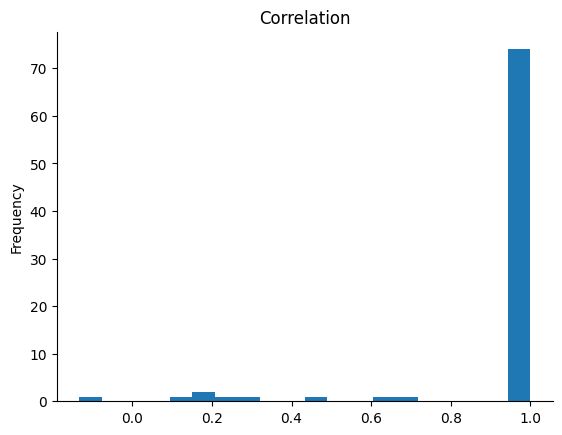

In [ ]:
# @title Correlation

from matplotlib import pyplot as plt
max_corr_per_country['Correlation'].plot(kind='hist', bins=20, title='Correlation')
plt.gca().spines[['top', 'right',]].set_visible(False)

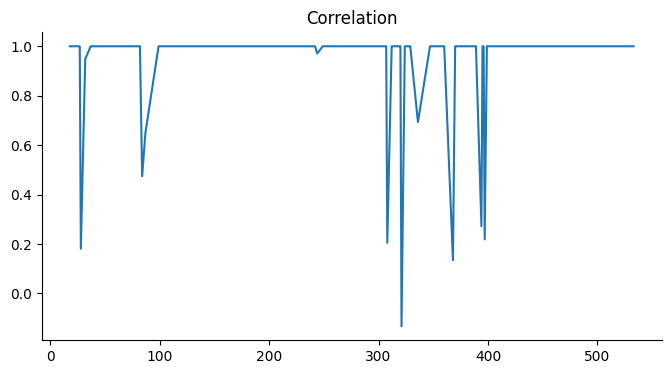

In [ ]:
# @title Correlation

from matplotlib import pyplot as plt
max_corr_per_country['Correlation'].plot(kind='line', figsize=(8, 4), title='Correlation')
plt.gca().spines[['top', 'right']].set_visible(False)

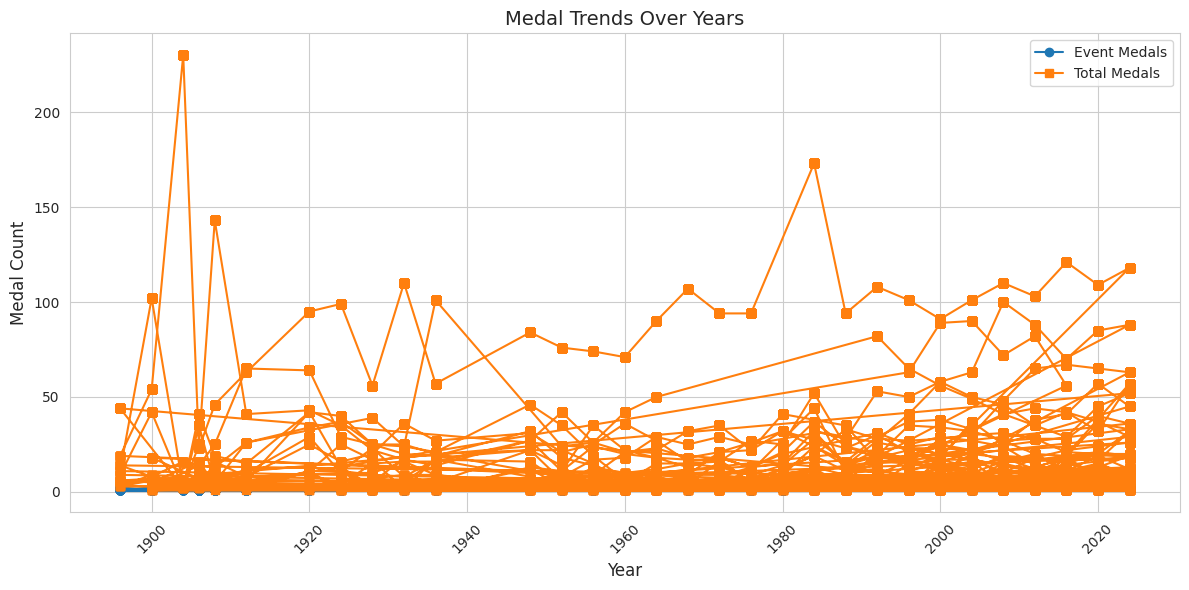

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # 设置背景网格

df = merged

plt.plot(df["Year"], df["Event Medals"], label="Event Medals", color="#1f77b4", marker="o")
plt.plot(df["Year"], df["Total Medals"], label="Total Medals", color="#ff7f0e", marker="s")
plt.title("Medal Trends Over Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Medal Count", fontsize=12)
plt.legend()
plt.xticks(rotation=45)  # 避免年份标签重叠
plt.tight_layout()
plt.show()

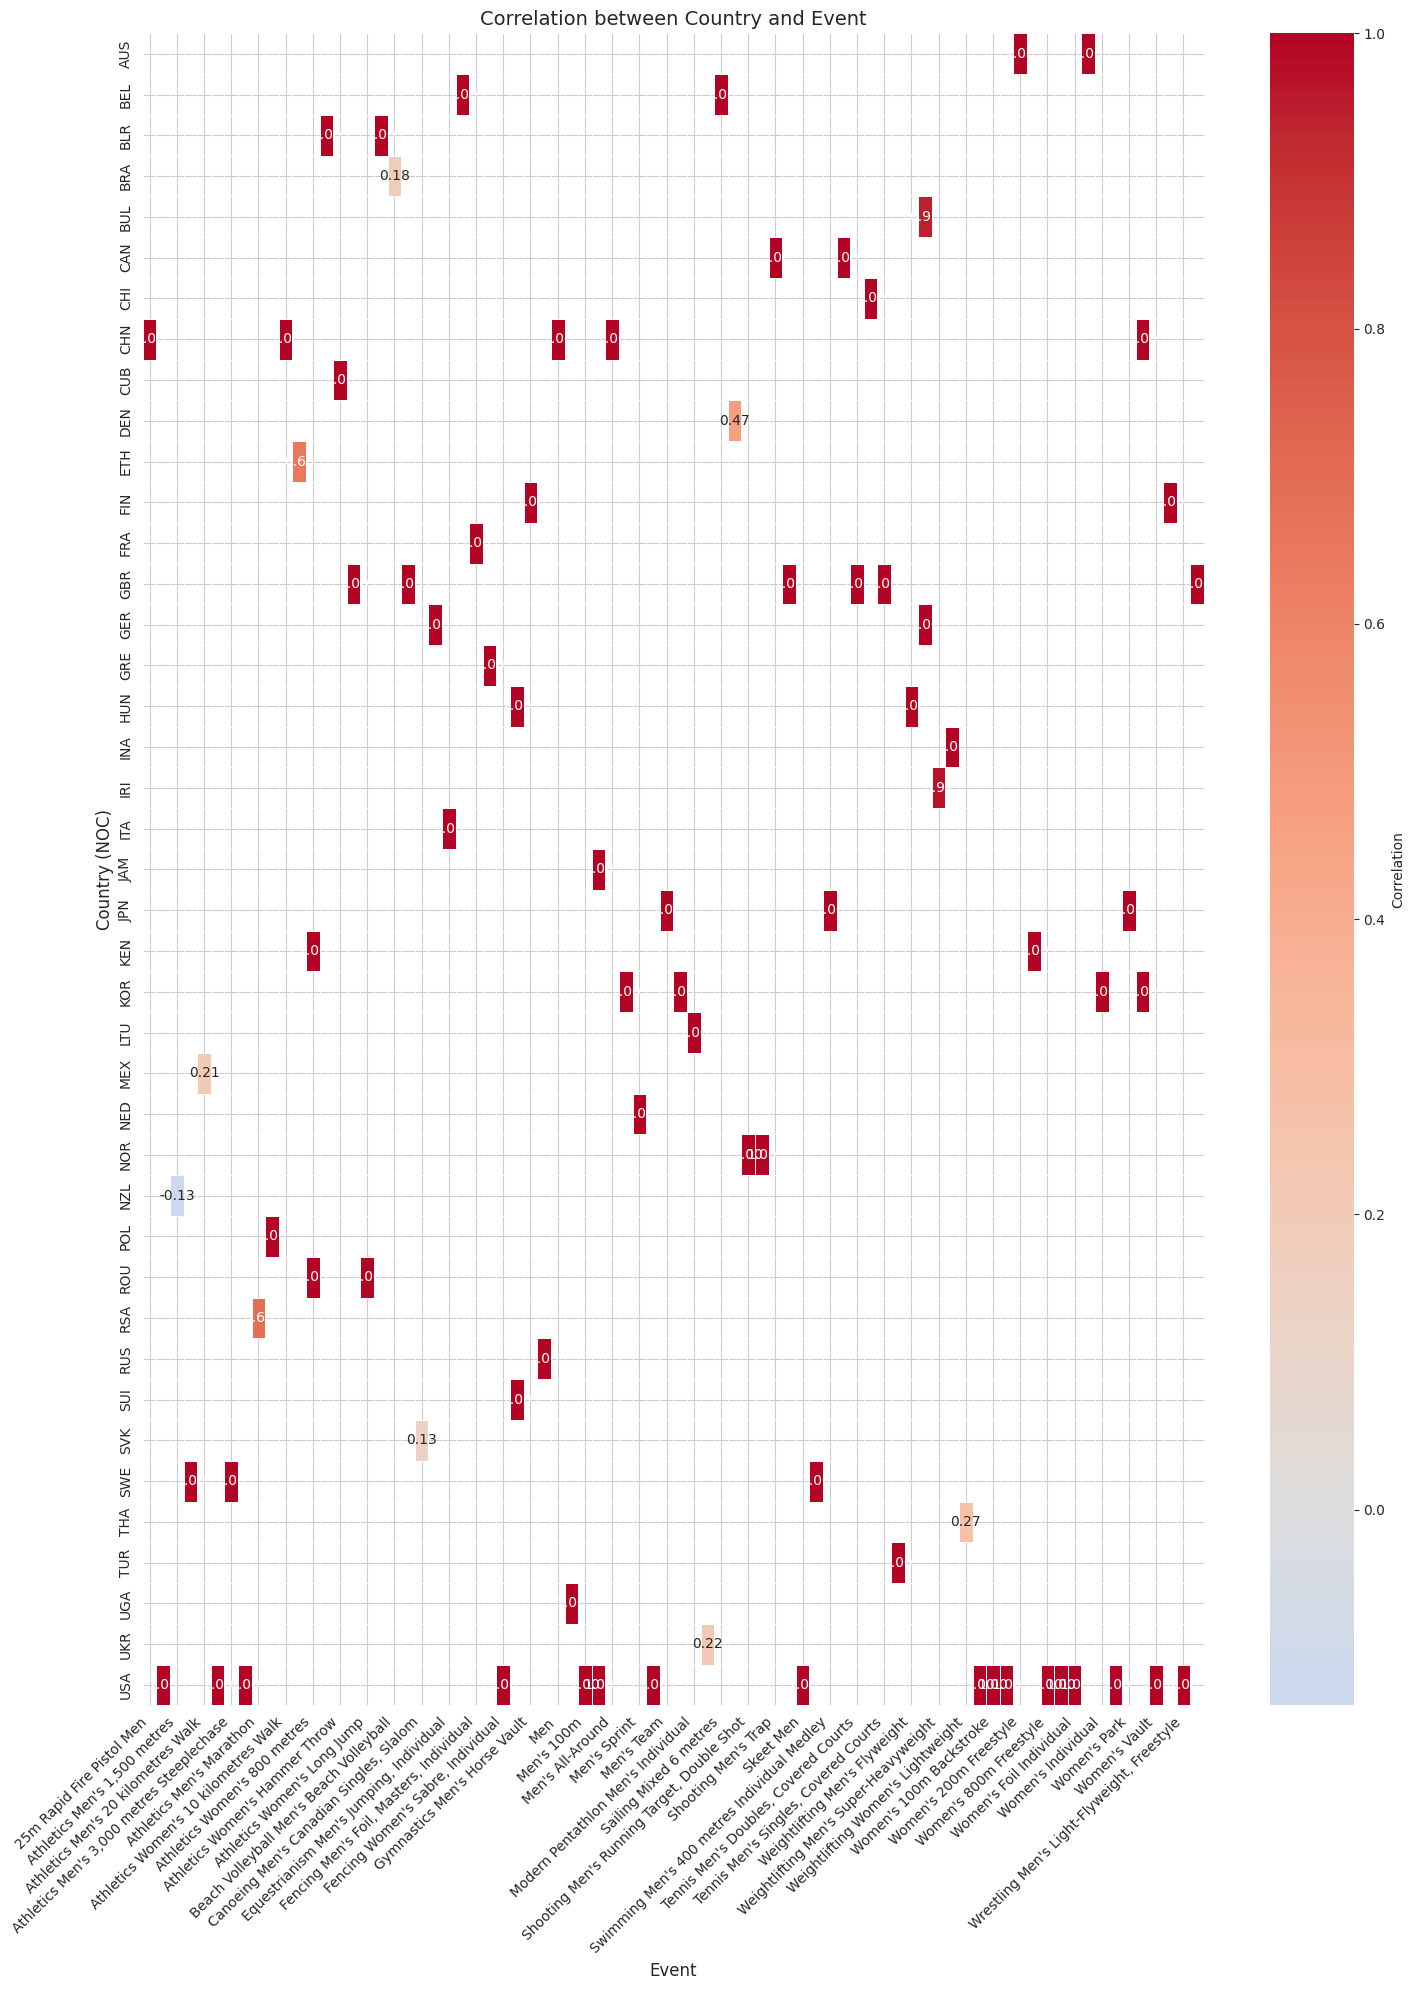

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 将数据转换为矩阵形式（国家为行，项目为列）
df = max_corr_per_country

corr_matrix = df.pivot(index="NOC", columns="Event", values="Correlation")

plt.figure(figsize=(15, 20))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",  # 红-蓝表示正负相关
    center=0,
    annot=True,       # 显示数值
    fmt=".2f",        # 小数格式
    linewidths=0.5,
    cbar_kws={"label": "Correlation"}
)
plt.title("Correlation between Country and Event", fontsize=14)
plt.xlabel("Event", fontsize=12)
plt.ylabel("Country (NOC)", fontsize=12)
plt.xticks(rotation=45, ha="right")  # 旋转项目标签
plt.tight_layout()
# plt.show()
# 图片保存至correlation between country and event
plt.savefig('correlation_between_country_and_event.png')
plt.show()

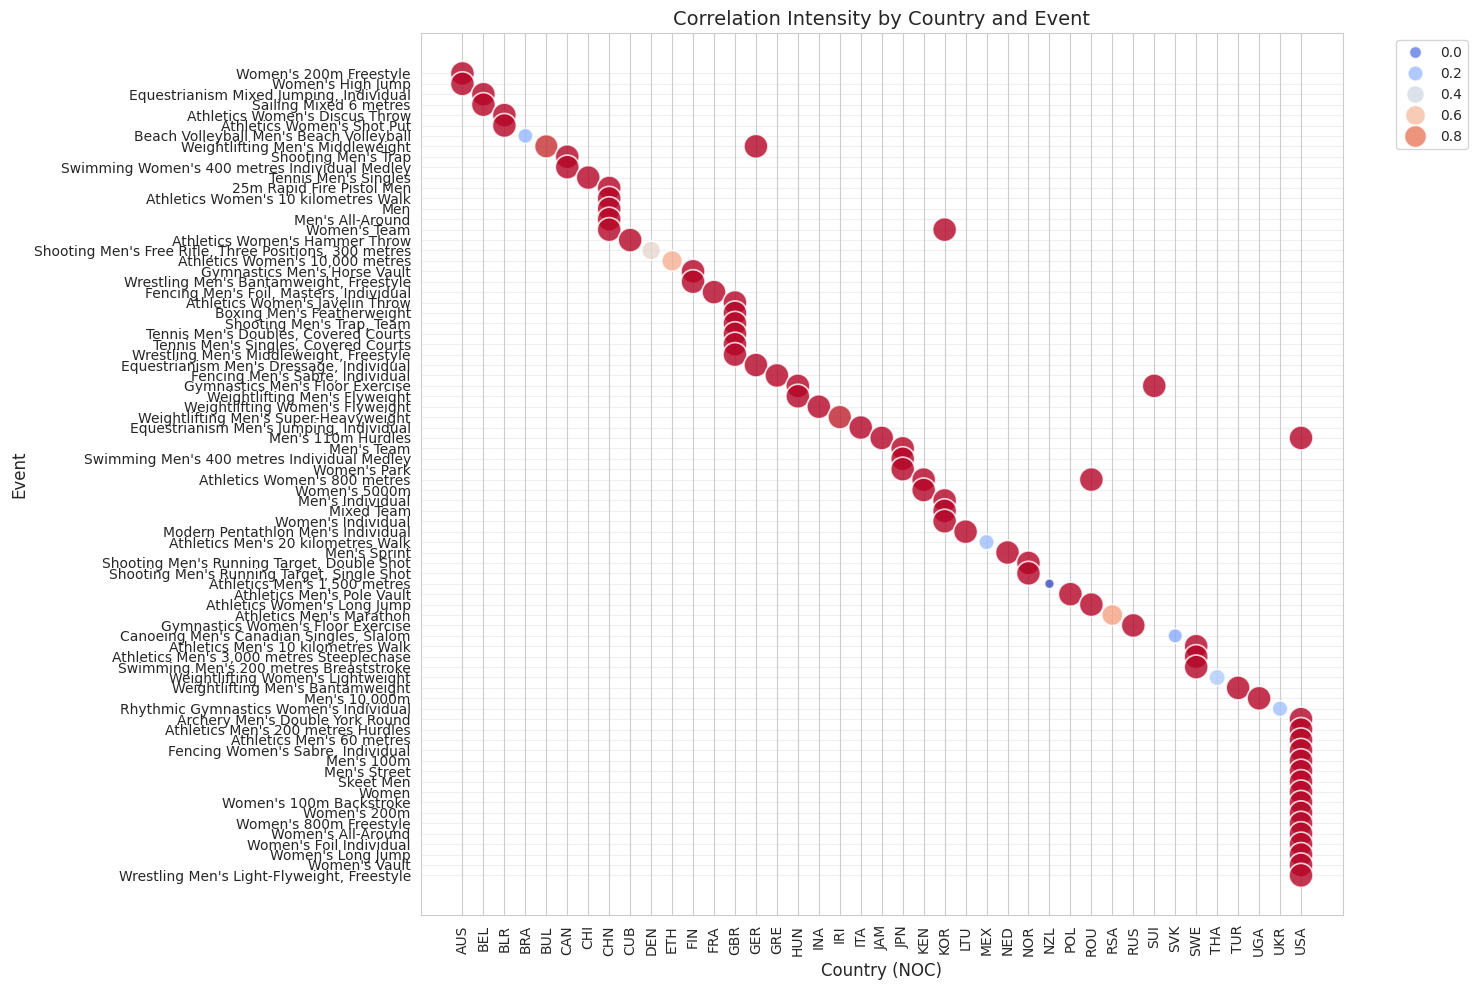

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df,
    x="NOC",
    y="Event",
    size="Correlation",
    hue="Correlation",
    sizes=(50, 300),   # 气泡大小范围
    palette="coolwarm",
    alpha=0.8
)
plt.title("Correlation Intensity by Country and Event", fontsize=14)
plt.xlabel("Country (NOC)", fontsize=12)
plt.ylabel("Event", fontsize=12)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # 图例位置
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

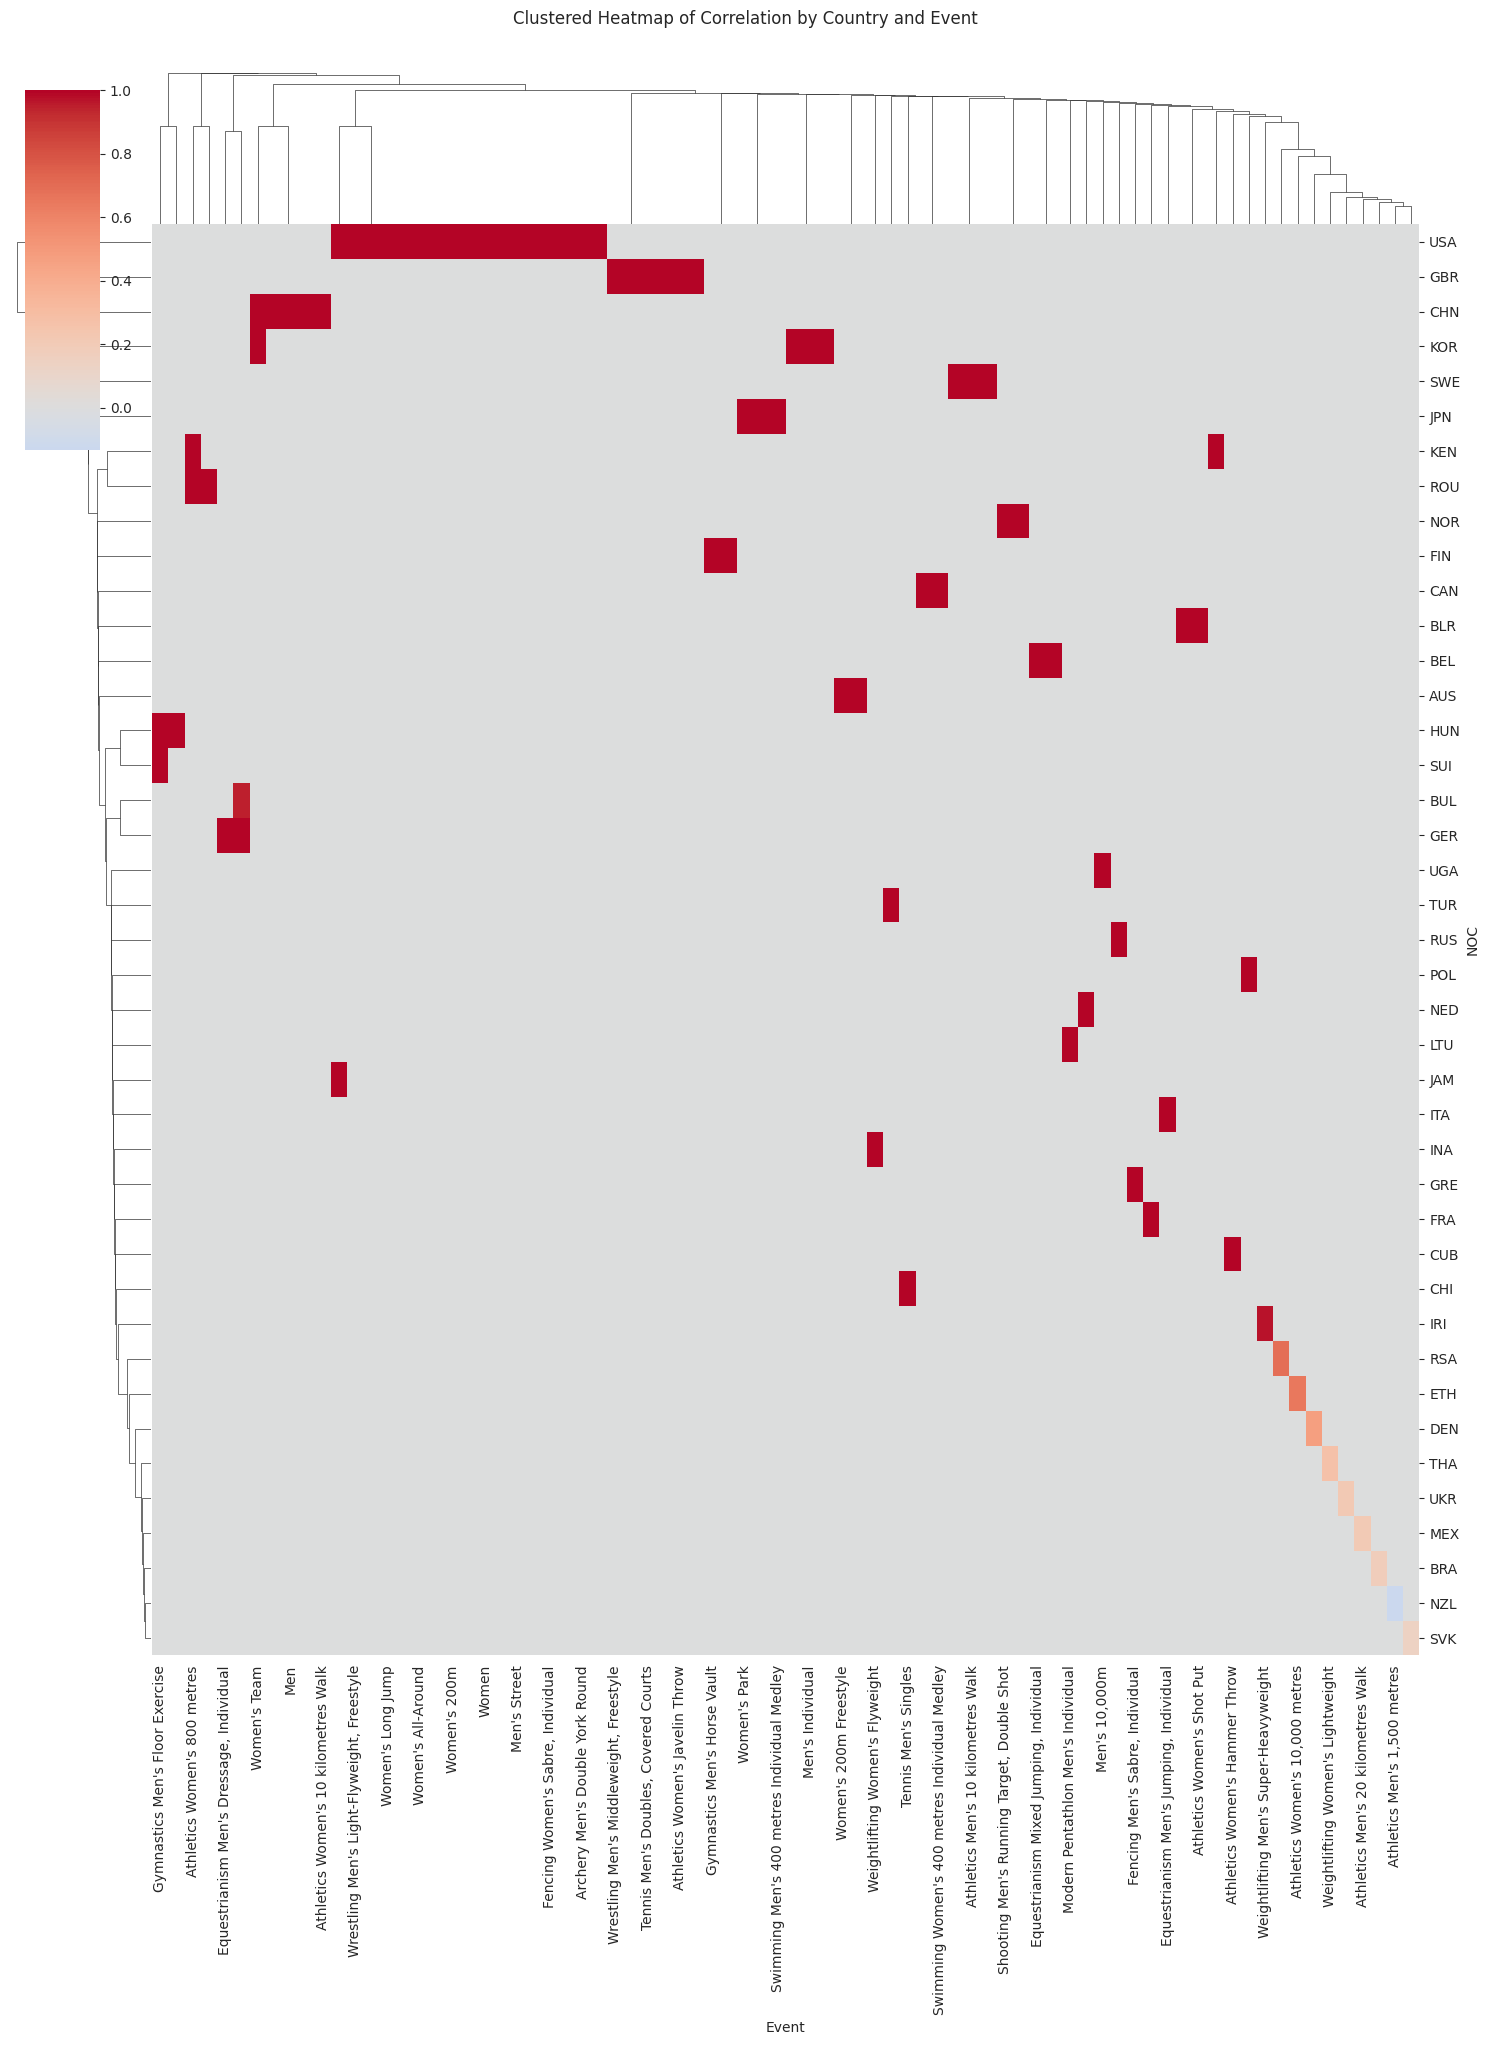

In [ ]:

# 使用层次聚类对行（国家）和列（项目）重新排序
sns.clustermap(
    corr_matrix.fillna(0),  # 处理缺失值
    cmap="coolwarm",
    center=0,
    figsize=(15, 20),
    dendrogram_ratio=0.1,   # 调整树状图大小
    cbar_pos=(0.02, 0.8, 0.05, 0.18)  # 调整颜色条位置
)
plt.suptitle("Clustered Heatmap of Correlation by Country and Event", y=1.02)
plt.savefig('clustered_heatmap_of_correlation_by_country_and_event.png')
plt.show()

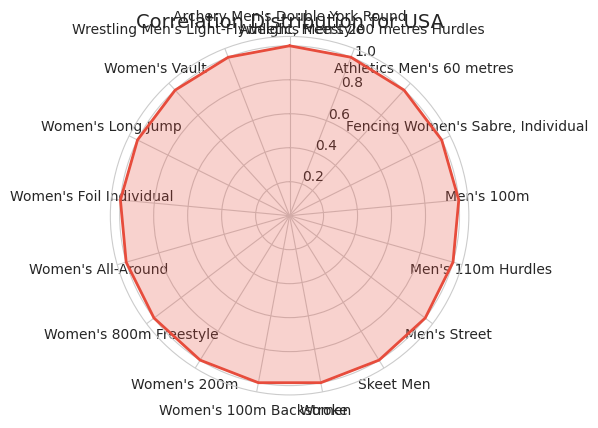

In [ ]:
import numpy as np

def plot_radar_chart(noc, df):
    country_data = df[df["NOC"] == noc]
    categories = country_data["Event"].tolist()
    values = country_data["Correlation"].tolist()
    N = len(categories)

    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values += values[:1]  # 闭合图形
    angles += angles[:1]

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, values, color="#e74c3c", linewidth=2)
    ax.fill(angles, values, color="#e74c3c", alpha=0.25)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=10)
    ax.set_title(f"Correlation Distribution for {noc}", fontsize=14)
    plt.tight_layout()

# 示例：绘制某国家的雷达图
plot_radar_chart("USA", df)

## 好教练效应

In [ ]:
athletes = pd.read_csv('summerOly_athletes_new.csv')
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235187 entries, 0 to 235186
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  235187 non-null  int64 
 1   Name        235187 non-null  object
 2   Sex         235187 non-null  object
 3   Team        235187 non-null  object
 4   NOC         235187 non-null  object
 5   Year        235187 non-null  int64 
 6   City        235187 non-null  object
 7   Sport       235187 non-null  object
 8   Event       235187 non-null  object
 9   Medal       235187 non-null  object
dtypes: int64(2), object(8)
memory usage: 17.9+ MB


In [ ]:
# 过滤掉 Medal 为 'No medal' 的行（保留实际获奖记录）
df_medals = athletes[athletes['Medal'] != 'No medal'].copy()

# 按国家和年份去重（避免同一年多次获奖重复计数）
df_country_year = df_medals[['NOC', 'Event', 'Year']].drop_duplicates().sort_values(['NOC', 'Year'])
print(df_country_year.head())
print(df_country_year.info())

def check_consecutive_years(years, min_consecutive=2):
    """判断年份列表中是否存在至少min_consecutive个连续年份"""
    years = sorted(years)
    consecutive_count = 1  # 初始连续计数
    for i in range(1, len(years)):
        if years[i] - years[i] <= 4:
            consecutive_count += 1
            if consecutive_count >= min_consecutive:
                return True
        else:
            consecutive_count = 1  # 重置连续计数
    return False

# 示例：检测是否有至少连续2年获奖
country_groups = df_country_year.groupby(['NOC','Event'])['Year'].apply(list)
consecutive_countries = country_groups[country_groups.apply(check_consecutive_years, min_consecutive=3)].index.tolist()
print(consecutive_countries)


def find_consecutive_periods(years):
    years = sorted(years)
    periods = []
    start = years[0]
    for i in range(1, len(years)):
        if years[i] - years[i-1] <= 4:
            if i == len(years)-1:  # 处理最后一个年份
                periods.append((start, years[i]))
        else:
            if start != years[i-1]:  # 避免单一年份
                periods.append((start, years[i-1]))
            start = years[i]
    return periods

# 生成结果
result = (
    df_country_year.groupby(['NOC','Event'])['Year']
    .apply(find_consecutive_periods)
    .reset_index(name='ConsecutivePeriods')
)
print(result.head())

# 过滤掉空值（无连续获奖的国家）
result = result[result['ConsecutivePeriods'].apply(len) > 3]

# 展开连续时间段
result_expanded = result.explode('ConsecutivePeriods').dropna()
result_expanded[['StartYear', 'EndYear']] = pd.DataFrame(
    result_expanded['ConsecutivePeriods'].tolist(),
    index=result_expanded.index
)
result_final = result_expanded[['NOC', 'Event', 'StartYear', 'EndYear']]
result_final.to_csv('country_get_medal_in_event_year.csv')
print(result_final.head())

        NOC                           Event  Year
131491  AFG       Taekwondo Men's Flyweight  2008
131492  AFG   Taekwondo Men's Featherweight  2012
222080  ALB            Men's Freestyle 65kg  2024
235017  ALB            Men's Freestyle 74kg  2024
125997  ALG  Boxing Men's Light-Heavyweight  1984
<class 'pandas.core.frame.DataFrame'>
Index: 14384 entries, 131491 to 35960
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     14384 non-null  object
 1   Event   14384 non-null  object
 2   Year    14384 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 449.5+ KB
None
[('ALG', "Athletics Men's 1,500 metres"), ('ARG', "Athletics Men's Marathon"), ('ARG', "Boxing Men's Featherweight"), ('ARG', "Boxing Men's Heavyweight"), ('ARG', "Boxing Men's Light-Heavyweight"), ('ARG', "Boxing Men's Middleweight"), ('ARG', "Boxing Men's Welterweight"), ('ARG', "Football Men's Football"), ('ARG', "Hockey Women's Hockey"), ('ARG', 'Sa

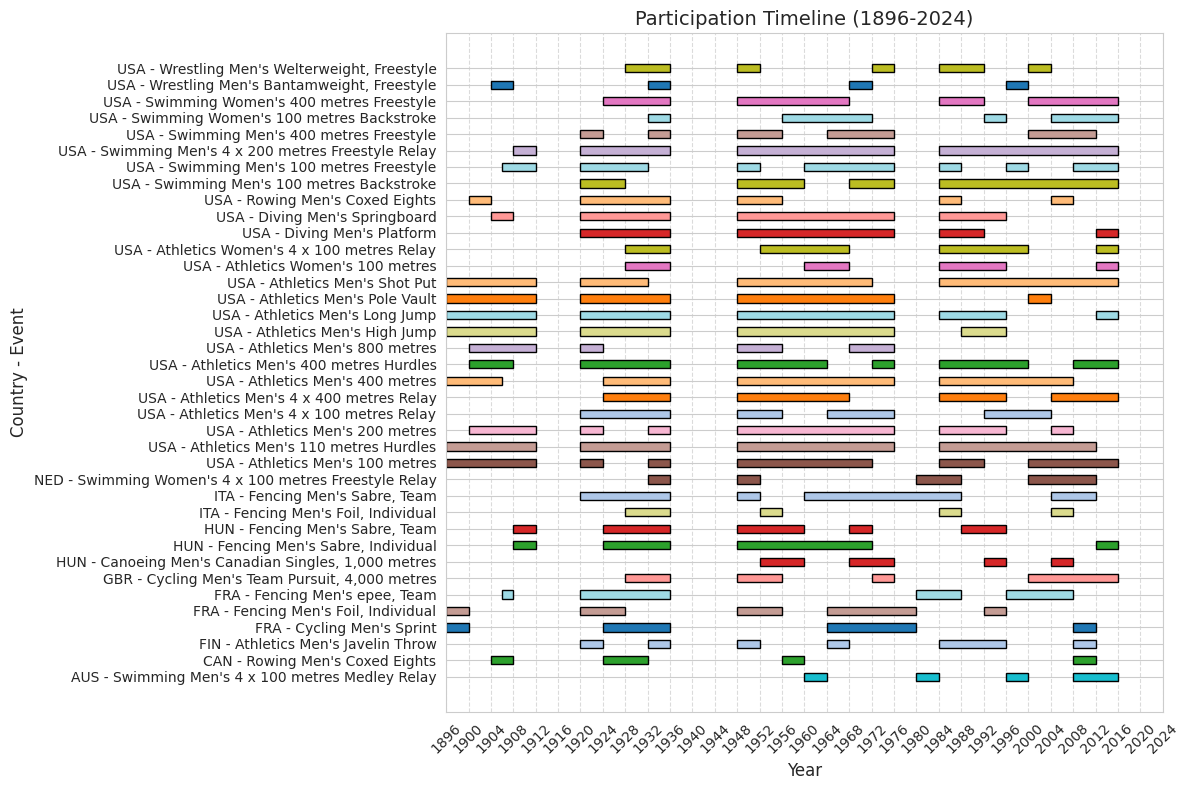

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

df = result_final

# 转换年份为日期格式（假设年份为整数）
df["StartDate"] = df["StartYear"].apply(lambda x: datetime(x, 1, 1))
df["EndDate"] = df["EndYear"].apply(lambda x: datetime(x, 1, 1))

# 创建画布
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制水平条形图（甘特图）
for i, row in df.iterrows():
    ax.barh(
        y=row["NOC"] + " - " + row["Event"],  # Y轴标签：国家+项目
        width=mdates.date2num(row["EndDate"]) - mdates.date2num(row["StartDate"]),
        left=mdates.date2num(row["StartDate"]),
        height=0.5,
        color=plt.cm.tab20(i % 20),  # 不同项目用不同颜色
        edgecolor="black"
    )

# 生成年份列表：1986, 1990, 1994, ..., 2024
years = list(range(1896, 2025, 4))  # 2025确保包含2024

# 将年份转换为日期对象
year_dates = [datetime(year, 1, 1) for year in years]

# 设置横坐标刻度和标签
ax.set_xticks([mdates.date2num(date) for date in year_dates])
ax.set_xticklabels([date.strftime("%Y") for date in year_dates])

# 设置横坐标范围（确保包含1986和2024）
ax.set_xlim(
    left=mdates.date2num(datetime(1896, 1, 1)),
    right=mdates.date2num(datetime(2024, 1, 1))
)

# 标签和标题
plt.xlabel("Year", fontsize=12)
plt.ylabel("Country - Event", fontsize=12)
plt.title("Participation Timeline (1896-2024)", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('participation_timeline.png')
plt.show()

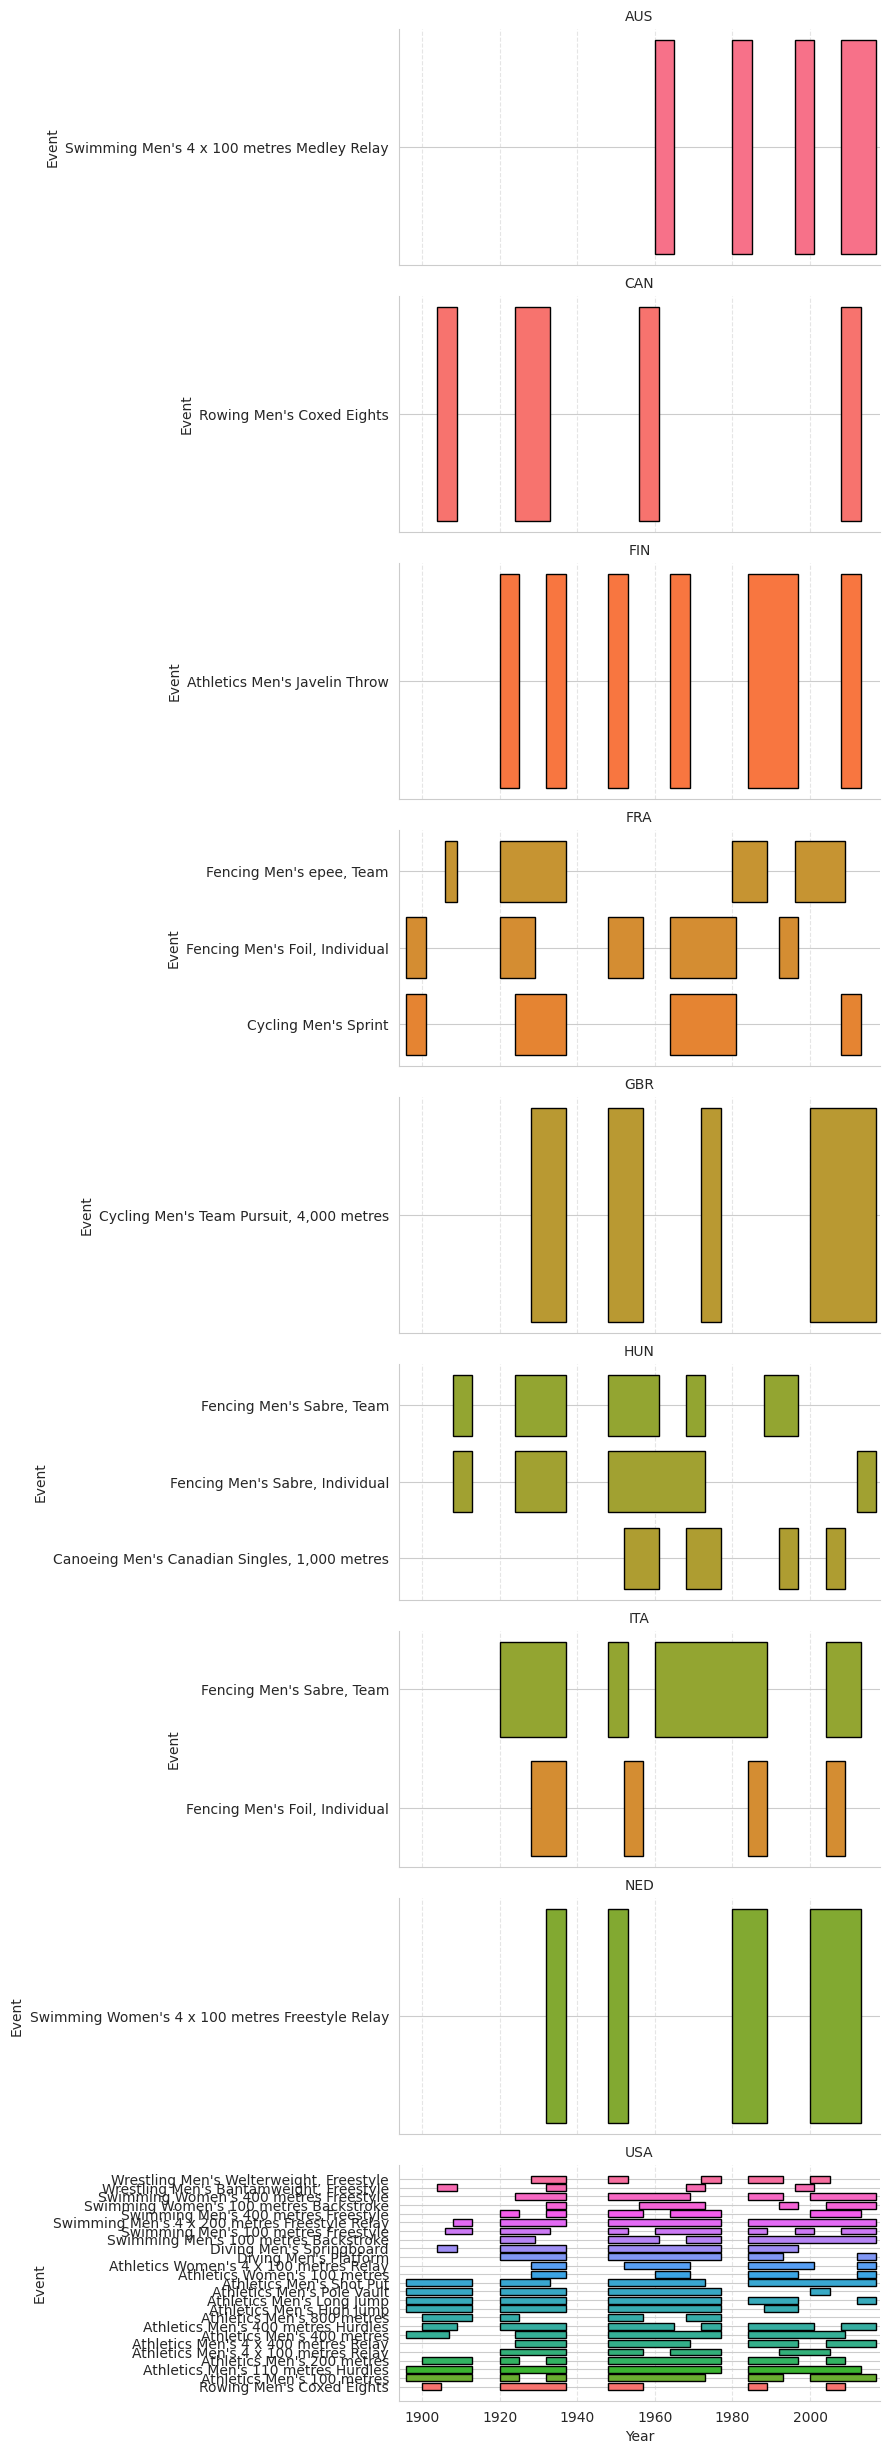

In [ ]:
import seaborn as sns

# 计算持续时间（年）
df["Duration"] = df["EndYear"] - df["StartYear"] + 1

# 分面绘图
g = sns.FacetGrid(
    df,
    row="NOC",         # 每个国家单独一行
    hue="Event",       # 按项目着色
    height=3,
    aspect=3,
    sharey=False       # 允许不同国家Y轴独立
)
g.map_dataframe(
    plt.barh,
    "Event",           # Y轴为项目
    "Duration",        # 条形长度为持续时间
    left="StartYear",  # 起始位置为开始年份
    edgecolor="black"
)
g.set_titles(row_template="{row_name}")  # 行标题为国家名
g.set_axis_labels("Year", "Event")
g.fig.subplots_adjust(top=0.9)
# g.fig.suptitle("Event Participation Duration by Country", fontsize=14)

# 添加参考线（年份刻度）
for ax in g.axes.flat:
    ax.grid(axis="x", linestyle="--", alpha=0.5)
    ax.set_xlim(df["StartYear"].min() - 2, df["EndYear"].max() + 2)

# plt.tight_layout()
# plt.show()

<ipython-input-142-2087a5350bfc>:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


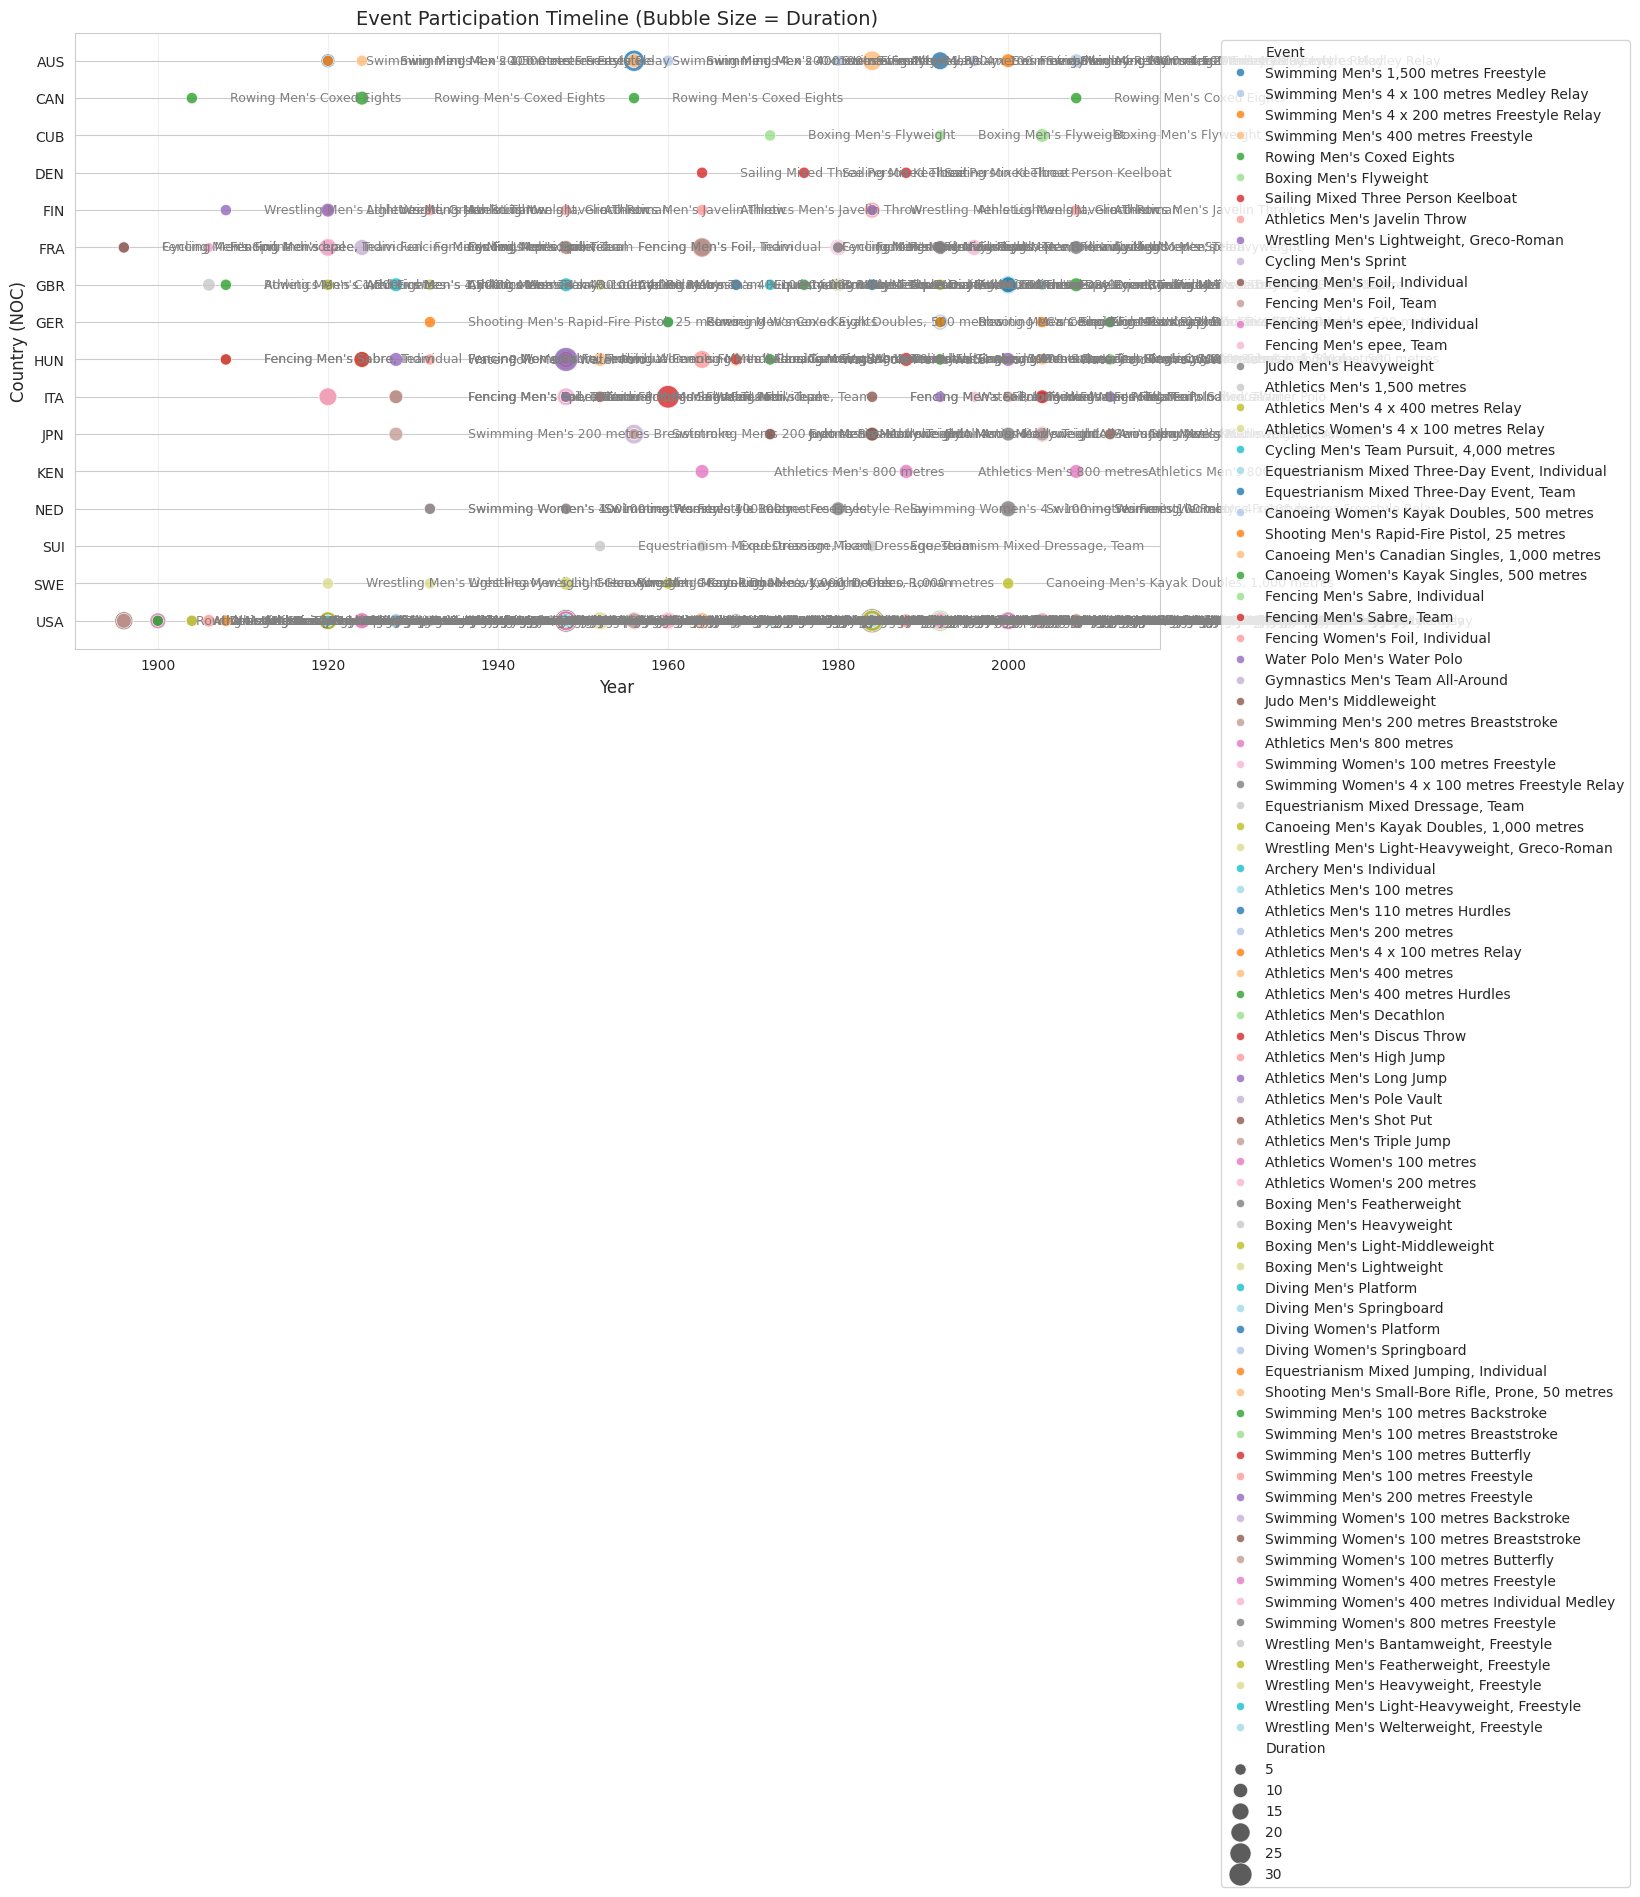

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df,
    x="StartYear",
    y="NOC",
    size="Duration",        # 气泡大小=持续时间
    hue="Event",            # 颜色=项目
    sizes=(50, 300),        # 气泡尺寸范围
    alpha=0.8,
    palette="tab20"
)

# 添加结束年份标签
for i, row in df.iterrows():
    plt.text(
        x=row["EndYear"] + 0.5,  # 标签位置在结束年份右侧
        y=row["NOC"],
        s=row["Event"],
        va="center",
        fontsize=9,
        color="gray"
    )

plt.title("Event Participation Timeline (Bubble Size = Duration)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Country (NOC)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:
hosts = pd.read_csv('summerOly_hosts.csv')
hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    35 non-null     int64 
 1   Host    35 non-null     object
dtypes: int64(1), object(1)
memory usage: 692.0+ bytes


In [32]:
athletes = pd.read_csv('summerOly_athletes_new.csv')
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235187 entries, 0 to 235186
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  235187 non-null  int64 
 1   Name        235187 non-null  object
 2   Sex         235187 non-null  object
 3   Team        235187 non-null  object
 4   NOC         235187 non-null  object
 5   Year        235187 non-null  int64 
 6   City        235187 non-null  object
 7   Sport       235187 non-null  object
 8   Event       235187 non-null  object
 9   Medal       235187 non-null  object
dtypes: int64(2), object(8)
memory usage: 17.9+ MB


<ipython-input-37-474f08ff958f>:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(angles, ratio.tolist() + [ratio[0]], linewidth=2)


ValueError: x and y must have same first dimension, but have shapes (71,) and (72,)

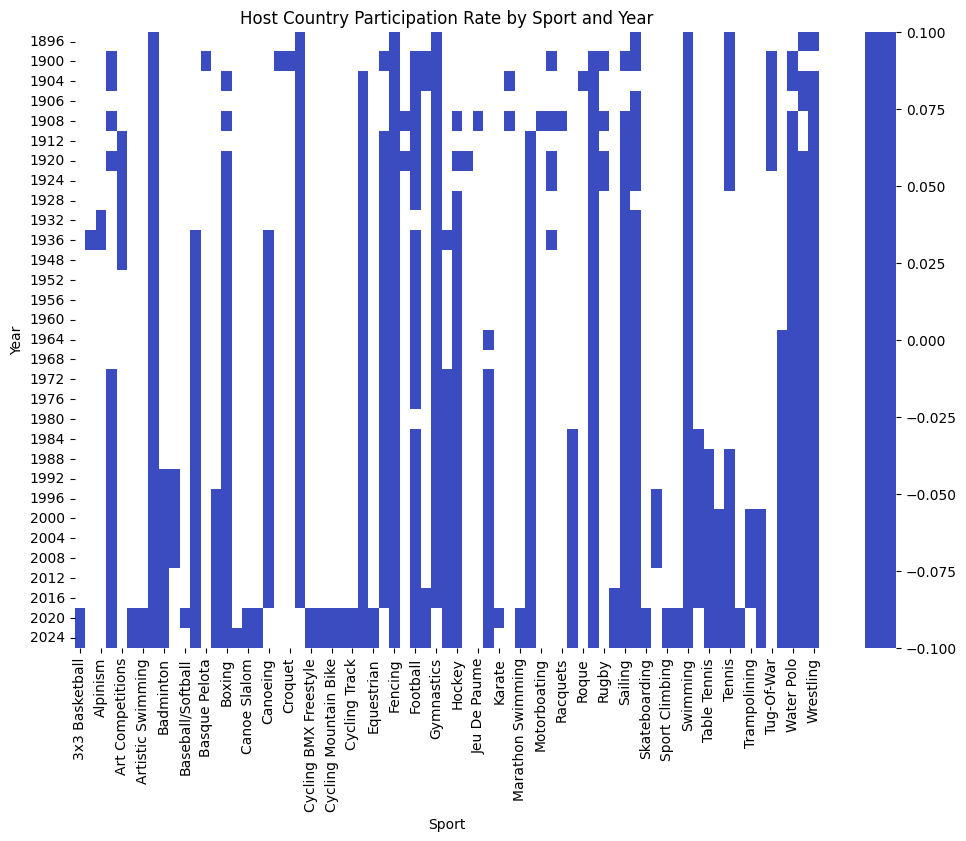

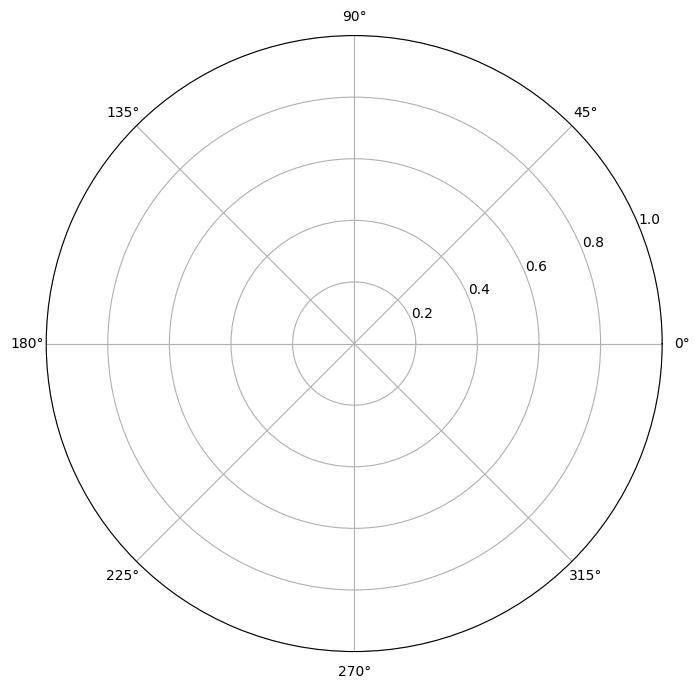

In [37]:
# 合并东道主信息
merged = pd.merge(athletes, hosts, on='Year', how='left')
merged['is_host'] = (merged['NOC'] == merged['Host']).astype(int)

# 生成项目变更特征
event_history = merged.groupby(['Year','Sport']).size().unstack().fillna(0)
host_years = hosts['Year'].unique()

# 判断是否为新项目（近三届首次出现）
merged['is_new_event'] = merged.groupby('Sport')['Year'].transform(
    lambda x: (x.min() >= x.max() - 8) & (x.max() == x.iloc[-1])).astype(int)

panel_data = merged.groupby(['NOC','Year','Sport','Event']).agg({
    'Medal': lambda x: (x != 'No Medal').sum(),
    'is_host': 'first',
    'is_new_event': 'first'
}).reset_index()

panel_data['post'] = (panel_data['Year'] >= panel_data['Year'].shift()).astype(int)
panel_data['treat'] = (panel_data['is_host'] == 1) & (panel_data['is_new_event'] == 1)

# 固定效应模型
import statsmodels.formula.api as smf
model = smf.ols(
    'Medal ~ treat*post + C(NOC) + C(Year) + C(Sport)',
    data=panel_data
).fit(cov_type='cluster', cov_kwds={'groups': panel_data['NOC']})



import seaborn as sns

host_effect = panel_data.groupby(['Sport','Year'])['is_host'].mean().unstack()
plt.figure(figsize=(12,8))
sns.heatmap(host_effect.T, cmap='coolwarm', center=0)
plt.title("Host Country Participation Rate by Sport and Year")
plt.xlabel("Sport")
plt.ylabel("Year")
plt.savefig("host_country_participation_rate_by_sport_and_year.png")


from matplotlib.pyplot import polar

host_gain = panel_data[panel_data['is_host']==1].groupby('Sport')['Medal'].mean()
non_host_gain = panel_data[panel_data['is_host']==0].groupby('Sport')['Medal'].mean()
ratio = (host_gain / non_host_gain).fillna(0)

categories = ratio.index.tolist()
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, ratio.tolist() + [ratio[0]], linewidth=2)
ax.fill(angles, ratio.tolist() + [ratio[0]], alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Host Advantage Ratio by Sport")

In [38]:
medals = pd.read_csv('summerOly_medal_counts_new.csv')
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1294 non-null   int64 
 1   Rank        1294 non-null   int64 
 2   NOC         1294 non-null   object
 3   Gold        1294 non-null   int64 
 4   Silver      1294 non-null   int64 
 5   Bronze      1294 non-null   int64 
 6   Total       1294 non-null   int64 
 7   Year        1294 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 81.0+ KB


In [41]:
pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.9 MB/s eta 0:00:00


                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     278.9
Date:                Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:55:43   Log-Likelihood:                -4368.1
No. Observations:                1294   AIC:                             8798.
Df Residuals:                    1263   BIC:                             8958.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.3245    

Text(0.5, 1.0, 'Medal Distribution Before/After Event Reform')

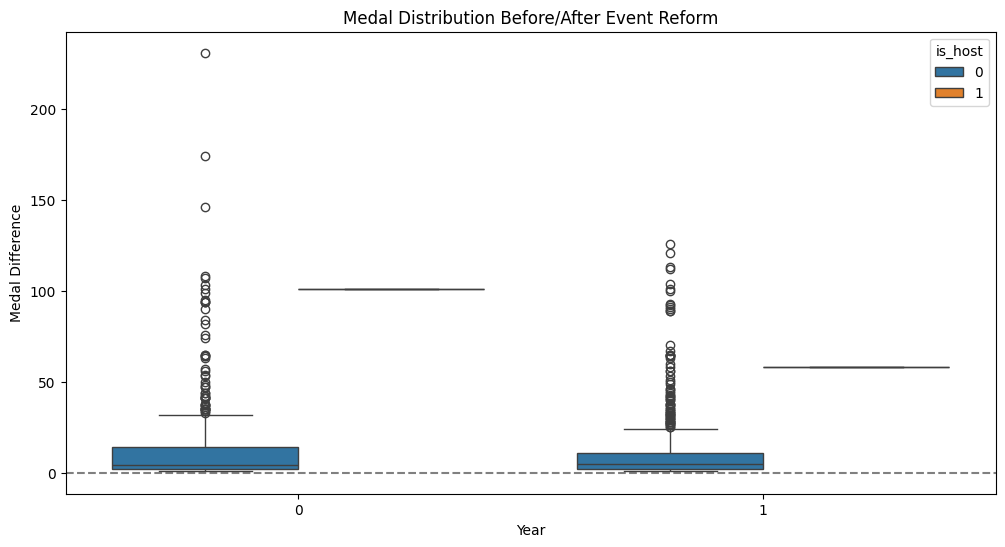

In [44]:
import pandas as pd

# 读取数据
hosts = pd.DataFrame({'Year': [1996, 2000, ..., 2020], 'Host': ['USA', 'AUS', ..., 'JPN']})
  # 包含NOC, Year, Gold, Silver, Bronze, Total等列

# 标记东道主年份
merged = pd.merge(medals, hosts, on='Year', how='left')
merged['is_host'] = (merged['NOC'] == merged['Host']).astype(int)

# 计算东道主国家过去3届平均奖牌数
merged['past3_avg'] = merged.groupby('NOC')['Total'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# 标记赛事调整年份（假设2000年后有项目调整）
merged['post_reform'] = (merged['Year'] >= 2000).astype(int)

import statsmodels.formula.api as smf

did_model = smf.ols('Total ~ is_host * post_reform + past3_avg + C(Year)', data=merged).fit()
print(did_model.summary())

import linearmodels as lm

merged = merged.set_index(['NOC', 'Year'])
model = lm.PanelOLS.from_formula('Total ~ is_host + past3_avg + EntityEffects + TimeEffects', data=merged)
results = model.fit(cov_type='clustered', cluster_entity=True)
print(results)

import seaborn as sns
import matplotlib.pyplot as plt

# 计算滑动窗口均值
host_effect = merged.groupby(['Year','is_host'])['Total'].mean().unstack()
host_effect['diff'] = host_effect[1] - host_effect[0]

plt.figure(figsize=(12,6))
sns.lineplot(data=host_effect, x='Year', y='diff', marker='o')
plt.axhline(0, color='grey', linestyle='--')
plt.title('Host Country Advantage Over Time')
plt.ylabel('Medal Difference')

sns.boxplot(x='post_reform', y='Total', hue='is_host', data=merged)
plt.title('Medal Distribution Before/After Event Reform')

TypeError: Invalid object type at position 2

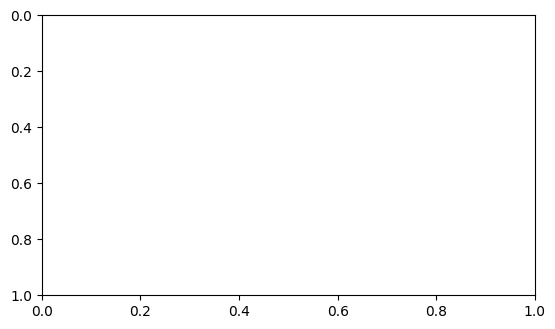

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from scipy import stats

# ====================
# 数据预处理
# ====================
# 加载数据（假设已读取为hosts和medals）
hosts = pd.DataFrame({
    'Year': [1896,1900,...,2024],  # 完整年份列表
    'Host': ['GRE','FRA',...,'FRA']  # 对应东道国NOC代码
})


# 合并数据并创建特征
merged = pd.merge(medals, hosts, on='Year', how='left')
merged['is_host'] = (merged['NOC'] == merged['Host']).astype(int)
merged['post_host'] = merged.groupby('NOC')['is_host'].shift(-1).fillna(0)

# 计算相对奖牌变化
merged['pct_change'] = merged.groupby('NOC')['Total'].pct_change(periods=1)

# ====================
# 可视化分析
# ====================
plt.figure(figsize=(14,8))

# 东道国奖牌趋势
ax1 = plt.subplot(2,2,1)
host_years = merged[merged['is_host']==1]
sns.lineplot(data=merged, x='Year', y='Total', hue='is_host',
            estimator='median', err_style='band', ax=ax1)
ax1.set_title('Host Country Medal Trends')

# 东道国效应分布
ax2 = plt.subplot(2,2,2)
host_effect = merged.groupby(['NOC','is_host'])['Total'].mean().unstack()
host_effect['diff'] = host_effect[1] - host_effect[0]
sns.histplot(host_effect['diff'].dropna(), kde=True, ax=ax2)
ax2.axvline(host_effect['diff'].mean(), color='r')
ax2.set_title('Host Effect Distribution')

# 时间动态分析
ax3 = plt.subplot(2,2,3)
sns.regplot(x='Year', y='diff', data=host_effect.reset_index(),
           scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
ax3.set_title('Host Effect Over Time')

# 项目集中度分析
ax4 = plt.subplot(2,2,4)
merged['concentration'] = (merged['Gold']/merged['Total'])**2 + \
                         (merged['Silver']/merged['Total'])**2 + \
                         (merged['Bronze']/merged['Total'])**2
sns.boxplot(x='is_host', y='concentration', data=merged, ax=ax4)
ax4.set_title('Medal Concentration Index')

plt.tight_layout()

# ====================
# 统计建模
# ====================
# 双重差分模型
did_model = ols('''Total ~ is_host * C(post_host)
                 + C(NOC) + C(Year)
                 + np.log(Total.shift(1))''',
               data=merged).fit(cov_type='cluster',
                              cov_kwds={'groups': merged['NOC']})

# 面板回归模型
from linearmodels import PanelOLS
merged_panel = merged.set_index(['NOC', 'Year'])
model = PanelOLS.from_formula(
    '''Total ~ is_host + EntityEffects + TimeEffects
     + np.log(Total).shift(1)''',
    data=merged_panel)
results = model.fit(cov_type='clustered', cluster_entity=True)

# ====================
# 结果输出
# ====================
print("DID Model Results:")
print(did_model.summary())

print("\nPanel Regression Results:")
print(results.summary)

# 计算显著性
t_stat, p_val = stats.ttest_ind(
    host_effect[1].dropna(),
    host_effect[0].dropna()
)
print(f"\nHost Effect T-test: t={t_stat:.2f}, p={p_val:.4f}")

# ====================
# 高级分析：赛事设置影响
# ====================
# 需要补充event数据的情况下：
if 'Event' in merged.columns:
    # 计算项目集中度
    host_events = merged[merged['is_host']==1].groupby('Year')['Event'].nunique()
    non_host_events = merged[merged['is_host']==0].groupby('Year')['Event'].nunique()

    plt.figure()
    sns.regplot(x=host_events, y=merged.groupby('Year')['Total'].mean())
    plt.title('Event Diversity vs Medal Count')

In [48]:
data = pd.read_csv('all_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6256 entries, 0 to 6255
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NOC           6256 non-null   object 
 1   Year          6256 non-null   int64  
 2   Gold          6256 non-null   int64  
 3   Silver        6256 non-null   int64  
 4   Bronze        6256 non-null   int64  
 5   Total         6256 non-null   int64  
 6   AthleteCount  6180 non-null   float64
 7   SportCount    6180 non-null   float64
 8   EventCount    6180 non-null   float64
 9   HasMedal      6180 non-null   float64
 10  SexRatio      6180 non-null   float64
 11  isHost        6256 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 586.6+ KB


              Host Average  Non-Host Average
Gold             23.642857          0.826429
Silver           21.000000          0.833173
Bronze           18.607143          0.926622
Total            63.250000          2.586224
AthleteCount    444.000000         25.402796
SportCount       24.857143          3.940832
EventCount      164.964286         16.263979
SexRatio          0.000000          0.000000
Gold: t-stat=29.46167822134087, p-val=9.152206177683969e-179
Silver: t-stat=29.977843899068024, p-val=1.3098977766241904e-184
Bronze: t-stat=26.216175936723772, p-val=8.090758538338538e-144
Total: t-stat=29.503311280790086, p-val=3.111460773630183e-179
AthleteCount: t-stat=34.275705453364836, p-val=7.188122995336448e-236
SportCount: t-stat=16.96285688445677, p-val=4.0790863611400214e-63
EventCount: t-stat=22.286839116475726, p-val=6.739860327606078e-106
SexRatio: t-stat=nan, p-val=nan
                            OLS Regression Results                            
Dep. Variable:            

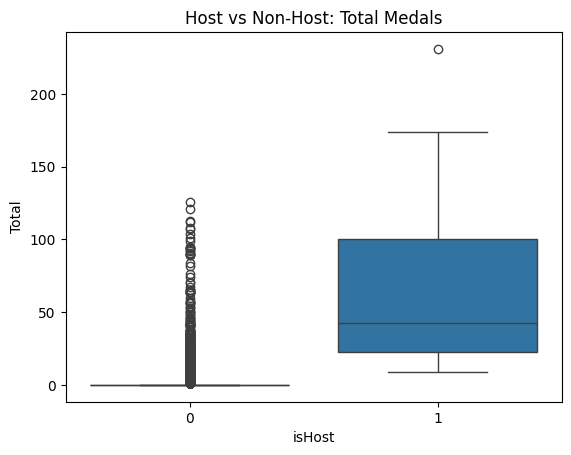

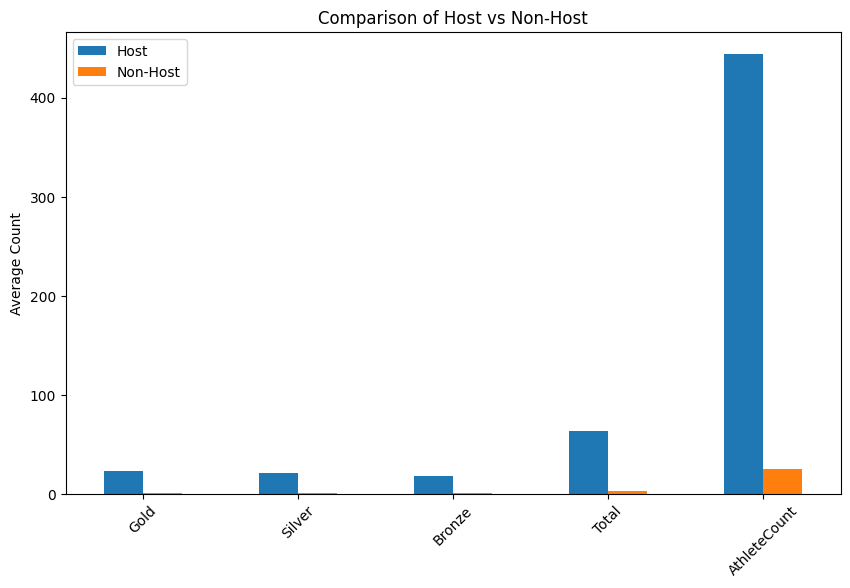

In [51]:
df = data
import pandas as pd

# 筛选数据
host_countries = df[df['isHost'] == 1]
non_host_countries = df[df['isHost'] == 0]

# 计算主办国与非主办国的平均值
metrics = ['Gold', 'Silver', 'Bronze', 'Total', 'AthleteCount', 'SportCount', 'EventCount', 'SexRatio']
host_avg = host_countries[metrics].mean()
non_host_avg = non_host_countries[metrics].mean()

# 比较结果
comparison = pd.DataFrame({'Host Average': host_avg, 'Non-Host Average': non_host_avg})
print(comparison)

from scipy.stats import ttest_ind

# 进行 t 检验
for metric in metrics:
    t_stat, p_val = ttest_ind(host_countries[metric].dropna(), non_host_countries[metric].dropna())
    print(f"{metric}: t-stat={t_stat}, p-val={p_val}")
import statsmodels.api as sm

# 构建回归模型
df = df.dropna()  # 去除缺失值
X = df[['isHost', 'AthleteCount', 'SportCount', 'EventCount']]
y = df['Total']
X = sm.add_constant(X)  # 添加常数项
model = sm.OLS(y, X).fit()

print(model.summary())
import matplotlib.pyplot as plt
import seaborn as sns

# 奖牌分布箱线图
sns.boxplot(x='isHost', y='Total', data=df)
plt.title("Host vs Non-Host: Total Medals")
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# 准备数据
metrics = ['Gold', 'Silver', 'Bronze', 'Total', 'AthleteCount']
host_avg = host_countries[metrics].mean()
non_host_avg = non_host_countries[metrics].mean()

# 绘制柱状图
avg_comparison = pd.DataFrame({'Host': host_avg, 'Non-Host': non_host_avg})
avg_comparison.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Host vs Non-Host")
plt.ylabel("Average Count")
plt.xticks(rotation=45)
plt.savefig('comparison_of_host_and_non-host.png')
plt.show()



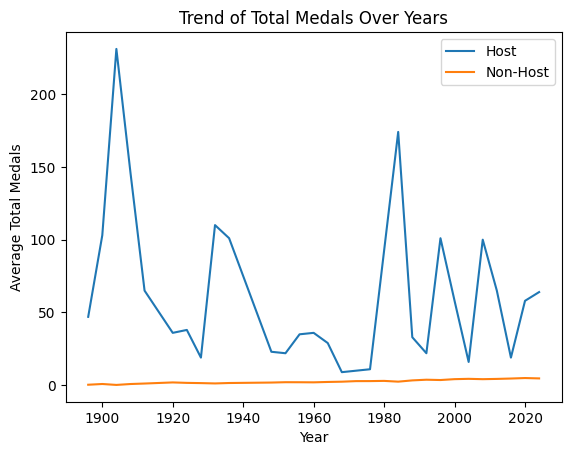

In [54]:
host_trend = host_countries.groupby('Year')['Total'].mean()
non_host_trend = non_host_countries.groupby('Year')['Total'].mean()

plt.plot(host_trend, label='Host')
plt.plot(non_host_trend, label='Non-Host')
plt.title("Trend of Total Medals Over Years")
plt.xlabel("Year")
plt.ylabel("Average Total Medals")
plt.legend()
plt.savefig('trend_of_total_medals_over_years.png')
plt.show()



In [56]:
data = pd.read_csv('consecutive_gold_3_or_more.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              160 non-null    object 
 1   Sex               160 non-null    int64  
 2   Team              160 non-null    object 
 3   NOC               160 non-null    object 
 4   Year              160 non-null    int64  
 5   City              160 non-null    object 
 6   Sport             160 non-null    object 
 7   Event             160 non-null    object 
 8   Medal             160 non-null    object 
 9   HasMedal          160 non-null    bool   
 10  prev_year         116 non-null    float64
 11  Consecutive_Gold  160 non-null    int64  
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 14.0+ KB


<ipython-input-58-d80942a3bbdc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NOC', y='Consecutive_Gold', data=data_sorted, palette='viridis')


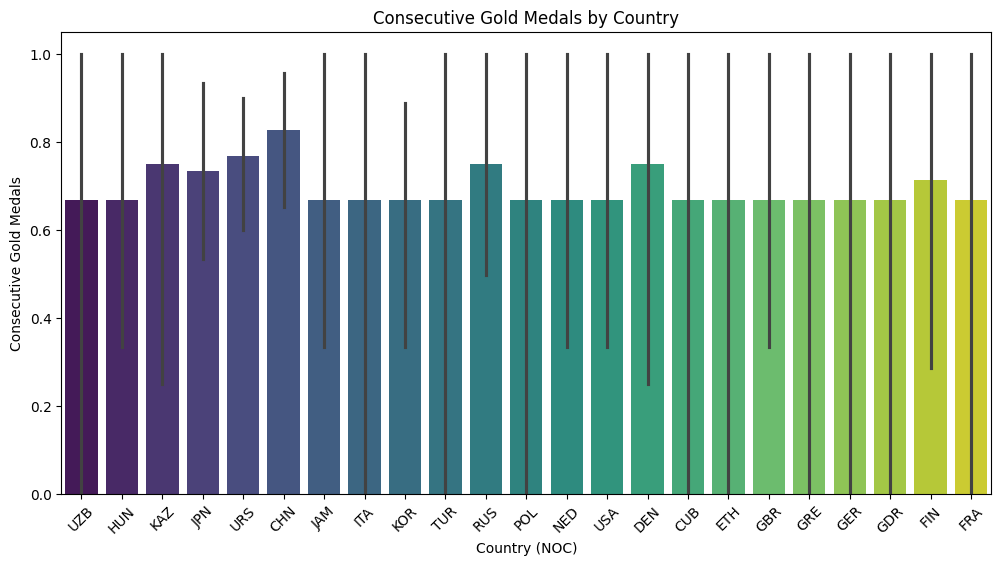

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

df=data.copy()

# 准备数据
data_sorted = df.sort_values(by='Consecutive_Gold', ascending=False)

# 绘制柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x='NOC', y='Consecutive_Gold', data=data_sorted, palette='viridis')
plt.title("Consecutive Gold Medals by Country")
plt.xlabel("Country (NOC)")
plt.ylabel("Consecutive Gold Medals")
plt.xticks(rotation=45)
plt.savefig('consecutive_gold_medal_by_country.png')
plt.show()


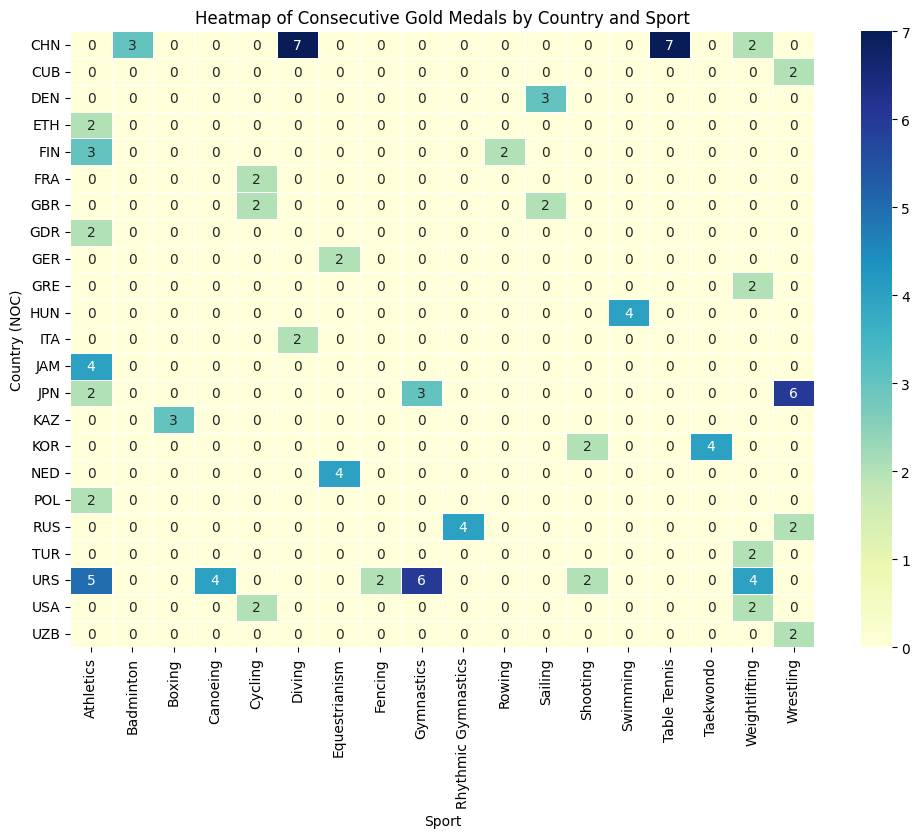

In [59]:
# 构建透视表
df = data.copy()

heatmap_data = df.pivot_table(index='NOC', columns='Sport', values='Consecutive_Gold', aggfunc='sum', fill_value=0)

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d", linewidths=0.5)
plt.title("Heatmap of Consecutive Gold Medals by Country and Sport")
plt.xlabel("Sport")
plt.ylabel("Country (NOC)")
plt.show()
